# __Markowitz Efficient Frontier__

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#making a new DataFrame of the Close Prices of the 5 stocks
ndf = pd.DataFrame({
    'EXIDEIND' : pd.read_csv('./stocks/EXIDEIND.NS.csv')[::-1]['Close'].values,
    'GAIL' : pd.read_csv('./stocks/GAIL.NS.csv')[::-1]['Close'].values,
    'JETAIRWAYS' : pd.read_csv('./stocks/JETAIRWAYS.NS.csv')[::-1]['Close'].values,
    'LT' : pd.read_csv('./stocks/LT.NS.csv')[::-1]['Close'].values,
    'RAYMOND' : pd.read_csv('./stocks/RAYMOND.NS.csv')[::-1]['Close'].values
})
ndf.head()

,EXIDEIND,GAIL,JETAIRWAYS,LT,RAYMOND
0,186.149994,123.699997,40.750000,1316.150024,656.849976
1,180.649994,123.900002,38.849998,1291.550049,643.450012
2,182.649994,124.449997,37.000000,1320.500000,639.049988
3,181.649994,124.349998,35.250000,1316.750000,642.900024
4,184.100006,125.650002,33.599998,1335.050049,664.500000


In [29]:
#finding daily returns of the whole dataframe 
ndf = ndf.pct_change()
ndf = ndf.dropna()
ndf.head()

,EXIDEIND,GAIL,JETAIRWAYS,LT,RAYMOND
1,-0.029546,0.001617,-0.046626,-0.018691,-0.020400
2,0.011071,0.004439,-0.047619,0.022415,-0.006838
3,-0.005475,-0.000804,-0.047297,-0.002840,0.006025
4,0.013488,0.010454,-0.046809,0.013898,0.033598
5,0.027159,-0.016713,-0.047619,0.007678,0.010384


In [34]:
#findind annual returns & volatility for 2000 portfolios
np.random.seed(20)
ret = []
vol = []
sharpe = []
for x in range(2000):
    weight = np.array(np.random.random(5))
    weight = weight/sum(weight)
    ret.append(np.sum((ndf.mean() * weight * 252)))
    vol.append(np.sqrt(np.dot(weight.T, np.dot(ndf.cov() * 252, weight))))
    sharpe.append(ret[x]/vol[x])
    
sharpe = np.array(sharpe)
vol = np.array(vol)

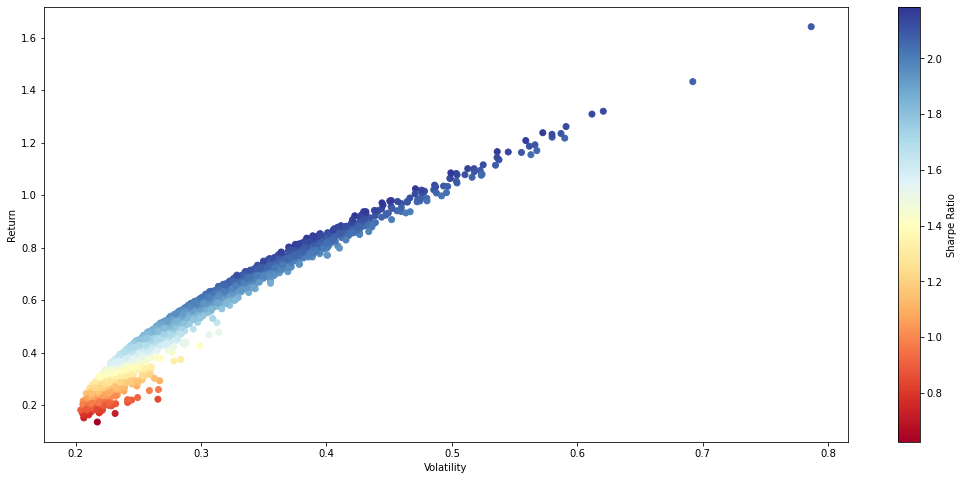

In [35]:
#plotting the Markowitz Efficient Frontier
plt.figure(figsize=(18,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol, ret, c=sharpe, cmap='RdYlBu')
plt.colorbar(label='Sharpe Ratio')

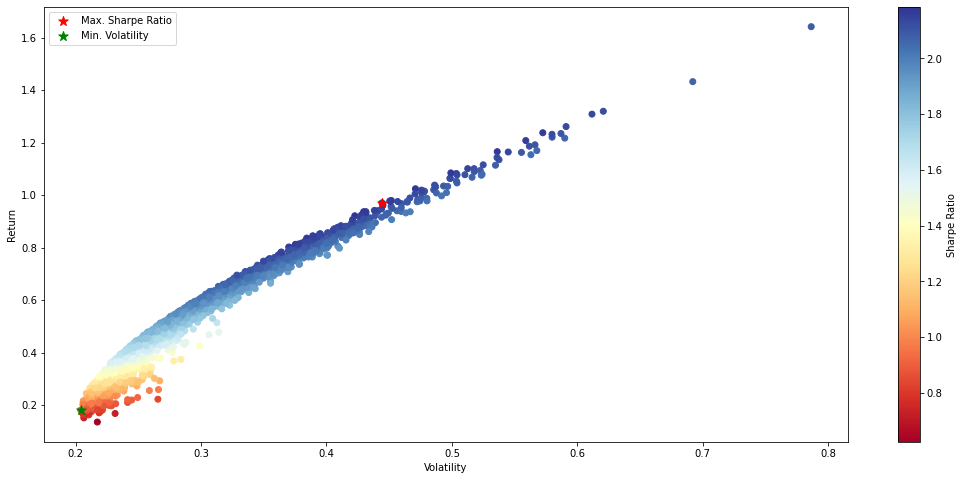

In [36]:
#plotting the Markowitz Efficient Frontier with Marking porfolios with Max Sharpe Ratio and Min Volatility
plt.figure(figsize=(18,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol, ret, c=sharpe, cmap='RdYlBu')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(vol[sharpe.argmax()] , ret[sharpe.argmax()],c='r', s=100, marker='*', label='Max. Sharpe Ratio')
plt.scatter(vol[vol.argmin()] , ret[vol.argmin()],c='g' ,s=100, marker='*', label='Min. Volatility')
plt.legend(loc='best')